# Formula One Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read In Data

In [2]:
# show all csv files
for f in os.listdir():
    if 'csv' in f:
        print(f)

GrandPrix_fastest-laps_details_1950_to_2022.csv
GrandPrix_races_details_1950_to_2022.csv
GrandPrix_drivers_details_1950_to_2022.csv


In [3]:
# read each csv file
df_drivers = pd.read_csv('GrandPrix_drivers_details_1950_to_2022.csv', encoding='latin-1')
df_races = pd.read_csv('GrandPrix_races_details_1950_to_2022.csv', encoding='latin-1')
df_laps = pd.read_csv('GrandPrix_fastest-laps_details_1950_to_2022.csv', encoding='latin-1')

## Cleaning

In [4]:
## check for missing data
df_drivers.isnull().sum()

Pos             0
Driver          0
Nationality     0
Car            11
PTS             0
year            0
dtype: int64

In [5]:
df_drivers[df_drivers['Car'].isnull()]

,Pos,Driver,Nationality,Car,PTS,year
16,13,Dorino Serafini SER,ITA,NaN,3.0,1950
17,13,Philippe Etancelin ETA,FRA,NaN,3.0,1950
21,20,Eugene Chaboud CHA,FRA,NaN,1.0,1950
35,12,Louis Rosier ROS,FRA,NaN,3.0,1951
53,13,Ken Wharton WHA,GBR,NaN,3.0,1952
309,18,Masten Gregory GRE,USA,NaN,0.0,1963
314,18,Mike Hailwood HAI,GBR,NaN,0.0,1963
446,13,Richard Attwood ATT,GBR,NaN,3.0,1969
478,2,Ronnie Peterson PET,SWE,NaN,33.0,1971
492,16,Mark Donohue DON,USA,NaN,4.0,1971


In [6]:
## Manually fill in missing values
df_drivers.at[16, 'Car'] = 'Ferrari'
df_drivers.at[17, 'Car'] = 'Talbot-Lago'
df_drivers.at[21, 'Car'] = 'Talbot-Lago'
df_drivers.at[35, 'Car'] = 'Talbot-Lago'
df_drivers.at[53, 'Car'] = 'Frazer Nash'
df_drivers.at[309, 'Car'] = 'Lotus BRM'
df_drivers.at[314, 'Car'] = 'Lotus Climax'
df_drivers.at[446, 'Car'] = 'Lotus Ford'
df_drivers.at[478, 'Car'] = 'March Ford'
df_drivers.at[492, 'Car'] = 'Mclaren Ford'
df_drivers.at[493, 'Car'] = 'March Ford'

In [7]:
df_drivers[df_drivers['Car'].isnull()]

,Pos,Driver,Nationality,Car,PTS,year


In [8]:
## check for missing data
df_races.isnull().sum()

Grand Prix    0
Date          0
Winner        0
Car           0
Laps          3
Time          0
year          3
dtype: int64

In [9]:
df_races[df_races['Laps'].isnull()]

,Grand Prix,Date,Winner,Car,Laps,Time,year
11,France,01 Jul 1951,Luigi Fagioli FAG,Alfa Romeo,NaN,1951,NaN
49,Argentina,22 Jan 1956,Luigi Musso MUS,Ferrari,NaN,1956,NaN
63,Great Britain,20 Jul 1957,Tony Brooks BRO,Vanwall,NaN,1957,NaN


In [10]:
df_races = df_races.drop([11,49,63])

In [11]:
df_races[df_races['Laps'].isnull()]

,Grand Prix,Date,Winner,Car,Laps,Time,year


In [12]:
## check for missing data
df_laps.isnull().sum()

Grand Prix    0
Driver        0
Car           0
Time          0
year          1
dtype: int64

In [13]:
df_laps[df_laps['year'].isnull()]

,Grand Prix,Driver,Car,Time,year
2,Indianapolis 500,Johnnie Parsons PAR,Kurtis Kraft Offenhauser,1950,NaN


In [14]:
df_laps = df_laps.drop(2)

In [15]:
df_laps[df_laps['year'].isnull()]

,Grand Prix,Driver,Car,Time,year


## Analysis

In [16]:
df_drivers.head()

,Pos,Driver,Nationality,Car,PTS,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


In [17]:
top_10_drivers_points = df_drivers[['Driver', 'PTS']].groupby('Driver').sum().sort_values(by='PTS', ascending=False).iloc[:10]

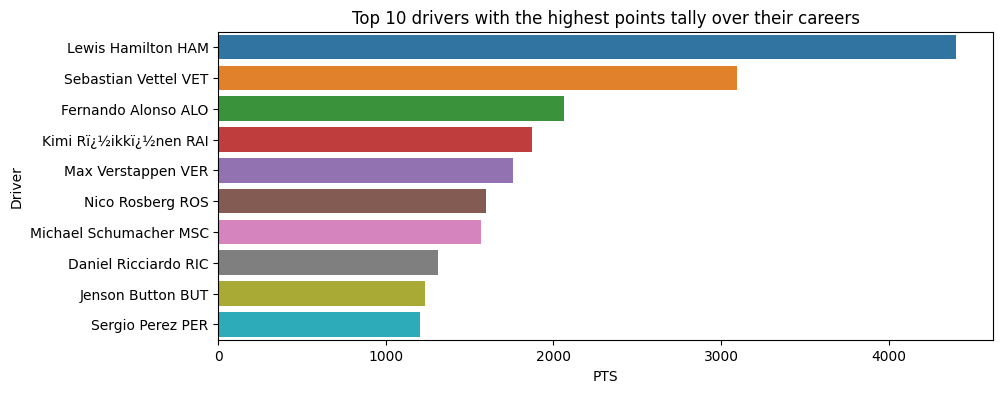

In [18]:
# Graph of drivers with the highest points tally over their career.
plt.figure(figsize=(10, 4))
sns.barplot(y=top_10_drivers_points.index, x=top_10_drivers_points.PTS, orient='h')
plt.title('Top 10 drivers with the highest points tally over their careers')
plt.show()

In [19]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pos          1618 non-null   object 
 1   Driver       1618 non-null   object 
 2   Nationality  1618 non-null   object 
 3   Car          1618 non-null   object 
 4   PTS          1618 non-null   float64
 5   year         1618 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 76.0+ KB


In [27]:
# teams with the highest points
top_10_teams_points = df_drivers[['Car', 'PTS']].groupby('Car').sum().sort_values(by='PTS', ascending=False).iloc[:10]

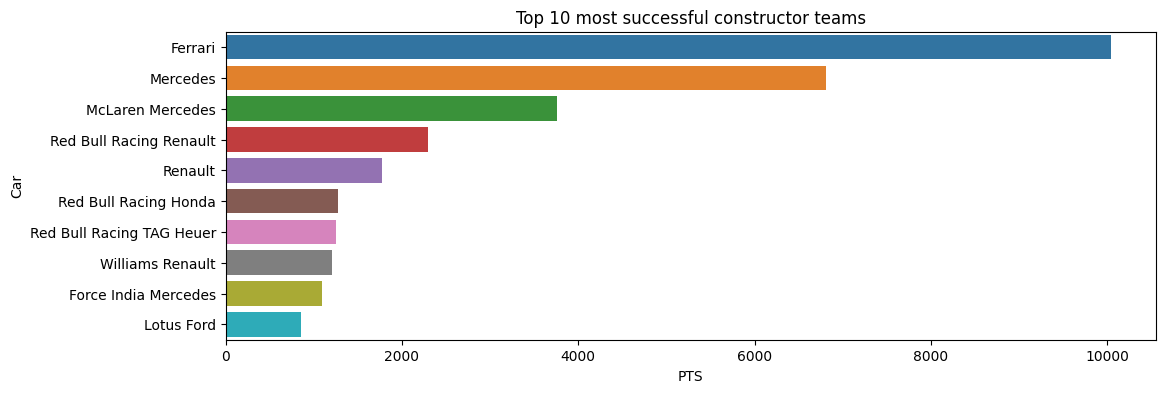

In [78]:
fig = plt.figure(figsize=(12, 4))
sns.barplot(x=top_10_teams_points.PTS, y=top_10_teams_points.index, orient='h')
plt.title('Top 10 most successful constructor teams')
plt.show()

In [133]:
# Most points over a single season - drivers/con
drivers_highest_points_single_season = df_drivers.sort_values(by='PTS', ascending=False).iloc[:70]

In [134]:
drivers_highest_points_single_season = drivers_highest_points_single_season.drop_duplicates(subset=['year'])

In [135]:
drivers_highest_points_single_season

,Pos,Driver,Nationality,Car,PTS,year
1596,1,Max Verstappen VER,NED,Red Bull Racing RBPT,454.0,2022
1532,1,Lewis Hamilton HAM,GBR,Mercedes,413.0,2019
1512,1,Lewis Hamilton HAM,GBR,Mercedes,408.0,2018
1398,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,397.0,2013
1575,1,Max Verstappen VER,NED,Red Bull Racing Honda,395.5,2021
1345,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,392.0,2011
1465,1,Nico Rosberg ROS,GER,Mercedes,385.0,2016
1421,1,Lewis Hamilton HAM,GBR,Mercedes,384.0,2014
1444,1,Lewis Hamilton HAM,GBR,Mercedes,381.0,2015
1489,1,Lewis Hamilton HAM,GBR,Mercedes,363.0,2017


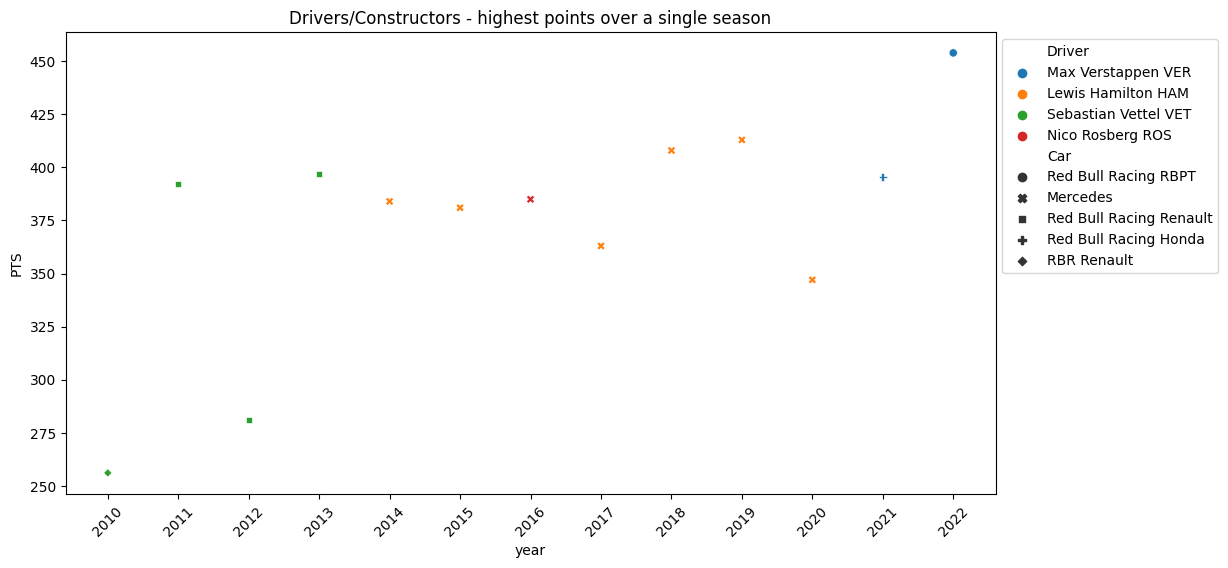

In [136]:
plt.figure(figsize=(12, 6))
plt.title('Drivers/Constructors - highest points over a single season')
sns.scatterplot(data=drivers_highest_points_single_season, x='year', y='PTS', hue='Driver', style='Car')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(drivers_highest_points_single_season.year, rotation=45)
plt.show()

In [238]:
# nations with the most drivers
nations_with_most_drivers = df_drivers.groupby('Nationality').agg({'Nationality': 'size', 'PTS': 'sum'})

nations_with_most_drivers  = nations_with_most_drivers.rename(columns={'Nationality': 'Count'})

nations_with_most_drivers = nations_with_most_drivers.sort_values(by='Count', ascending=False).iloc[:20]

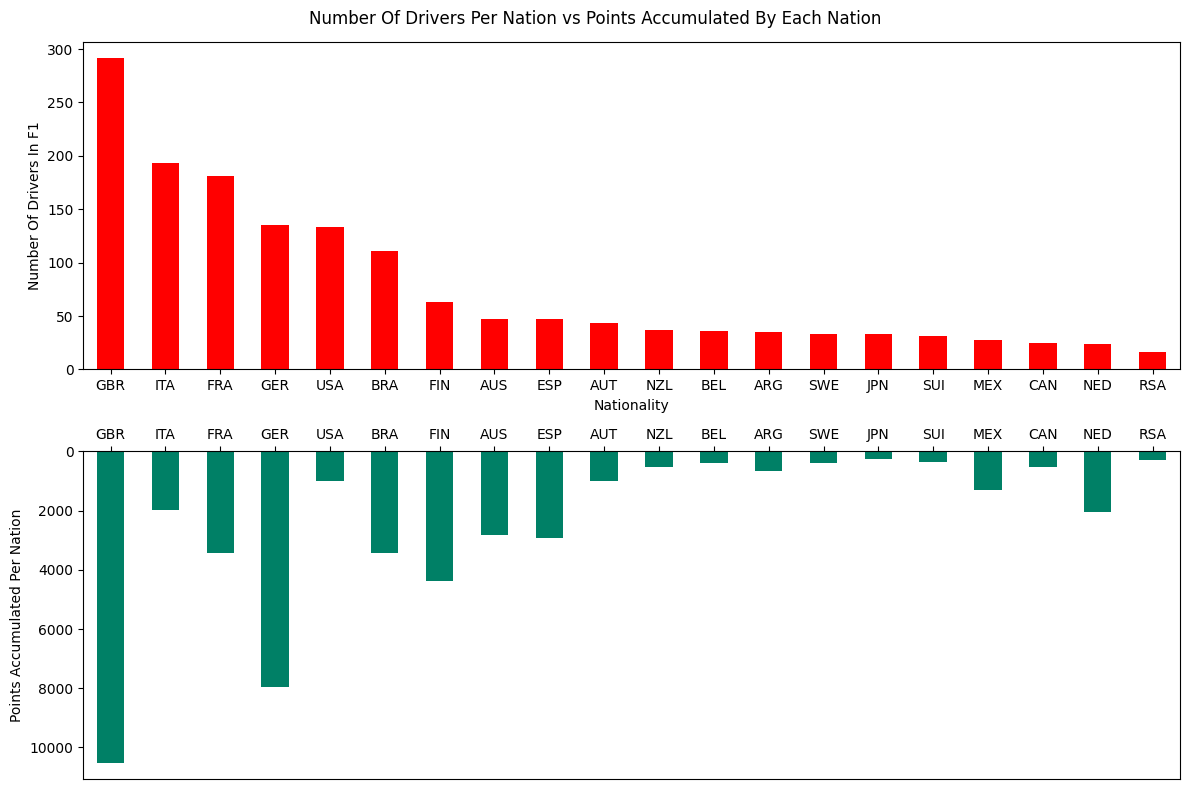

In [241]:
fig, (plot1, plot2) = plt.subplots(2, 1, figsize=(12,8))
fig.suptitle('Number Of Drivers Per Nation vs Points Accumulated By Each Nation')

nations_with_most_drivers.Count.plot(kind='bar', ax=plot1, colormap='autumn' )
plot1.set_xticklabels(nations_with_most_drivers.index, rotation=0)
plot1.set_ylabel('Number Of Drivers In F1')

nations_with_most_drivers.PTS.plot(kind='bar', ax=plot2, colormap='summer')
plot2.invert_yaxis()
plot2.xaxis.tick_top()
plot2.set_ylabel('Points Accumulated Per Nation')
plot2.set_xlabel(None)
plt.tight_layout()
